# Basic Exploratory Data Analysis
## Natural Language Processing
https://www.kaggle.com/c/nlp-getting-started/overview

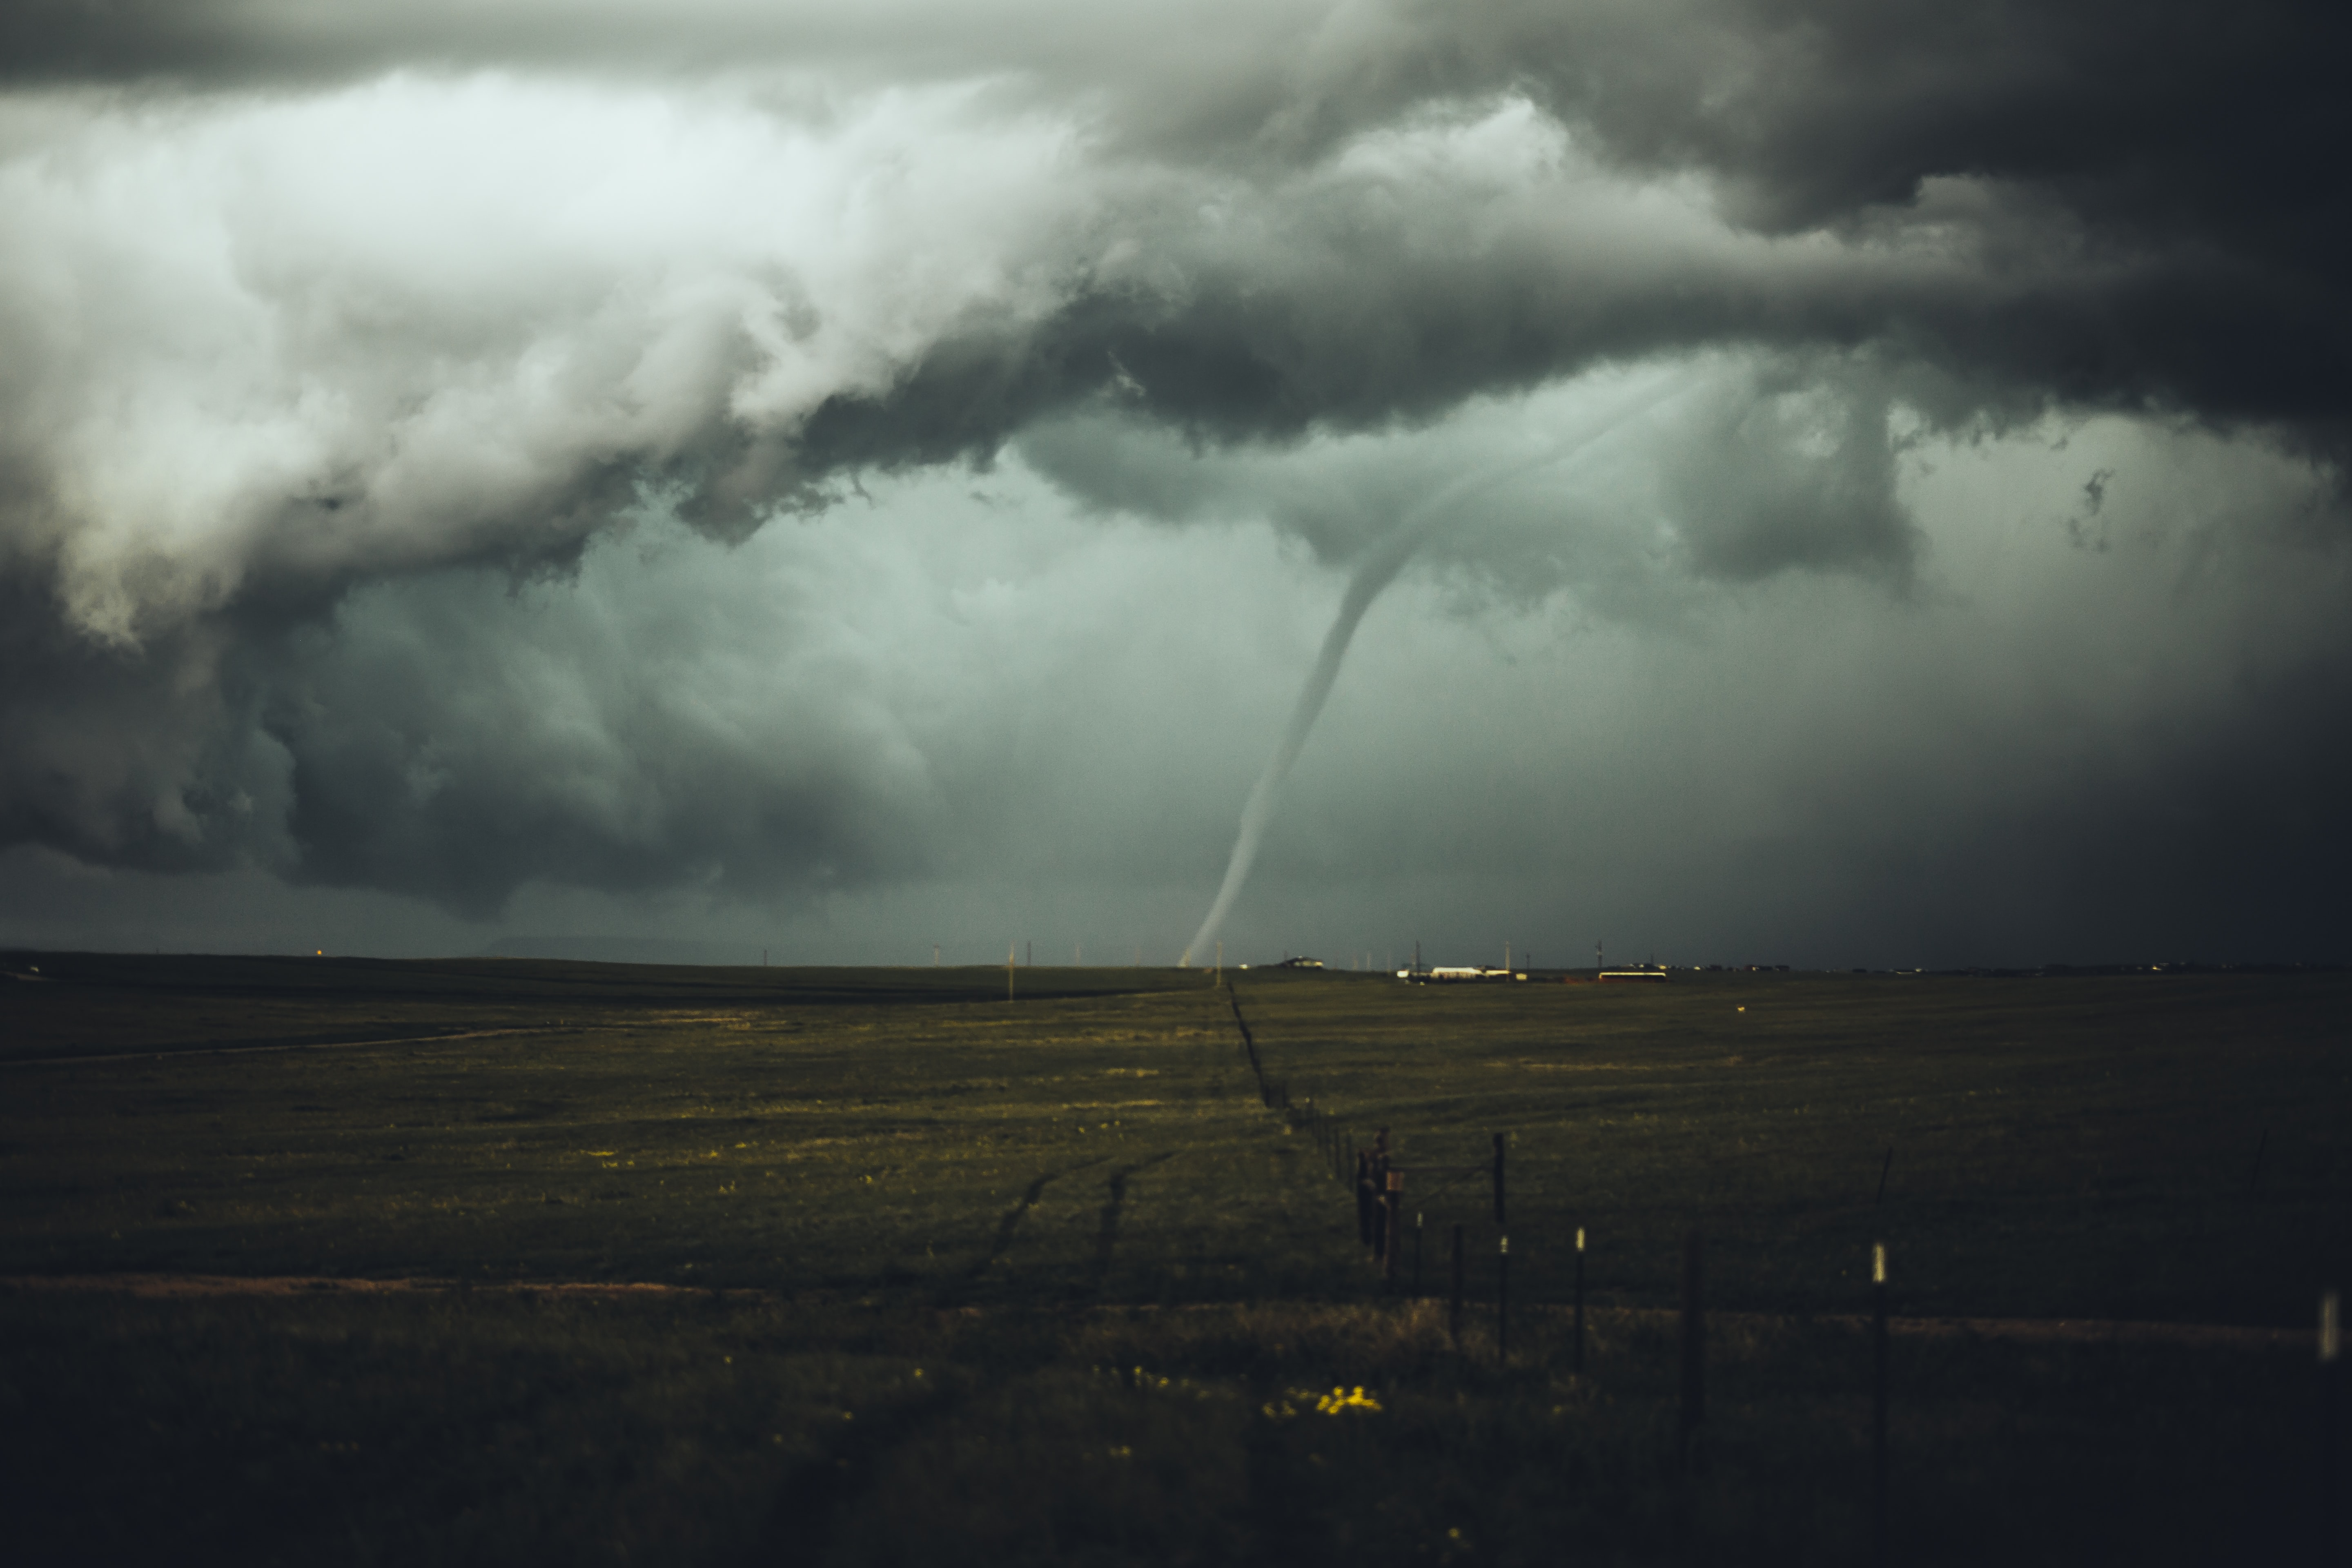

In [1]:
from IPython.display import Image
Image(filename='tornado.jpg', height="300")

# Aim: Decide whether tweets are announcing a disaster or not & prepare submission for kaggle

# imports libraries

In [2]:
# reading data
import numpy as np
import pandas as pd 

# metrics to evaluate model
from sklearn import metrics

# data preparation
from sklearn import feature_extraction, linear_model
from sklearn.model_selection import train_test_split

# model
from sklearn.linear_model import LogisticRegression

# visualisation
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

/home/alicja/.local/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# reads data

In [3]:
# add proper folder path to read datasets
train_df = pd.read_csv("twitter/train.csv")
test_df = pd.read_csv("twitter/test.csv")

# explores data

In [4]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [5]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


## disaster tweet

In [6]:
train_df[train_df['target']==1]['text'].values[2]

"All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected"

## not disaster twet

In [7]:
train_df[train_df['target']==0]['text'].values[2]

'Summer is lovely'

# LogisticRegression Model

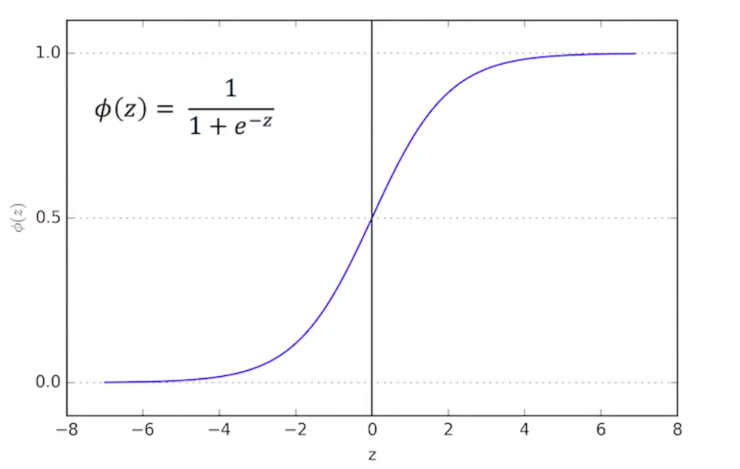

In [8]:
Image(filename='logisticregression.png')

In [9]:
clf = linear_model.LogisticRegression()

# fit & predict dataset sample

## create training and testing variables

In [10]:
train_df.head()

,id,keyword,location,text,target
0,1,NaN,NaN,Our Deeds are the Reason of this #earthquake M...,1
1,4,NaN,NaN,Forest fire near La Ronge Sask. Canada,1
2,5,NaN,NaN,All residents asked to 'shelter in place' are ...,1
3,6,NaN,NaN,"13,000 people receive #wildfires evacuation or...",1
4,7,NaN,NaN,Just got sent this photo from Ruby #Alaska as ...,1


In [11]:
# create training and testing variables

X_features = train_df["text"]
y_target = train_df["target"]

X_train, X_test, y_train, y_test = train_test_split(X_features, y_target, test_size=0.2)

## builds vectors

In [12]:
count_vectorizer = feature_extraction.text.CountVectorizer()

## fit and fit_transform

In [13]:
train_vectors = count_vectorizer.fit_transform(X_train)
test_vectors = count_vectorizer.transform(X_test)

In [14]:
train_vectors

<6090x18529 sparse matrix of type '<class 'numpy.int64'>'
	with 89247 stored elements in Compressed Sparse Row format>

## fit & predict the target 

In [15]:
clf.fit(train_vectors, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
y_pred = clf.predict(test_vectors)

## provides metrics

In [17]:
y_true = y_test.tolist()
y_pred = y_pred.tolist()

### Confusion matrix

In [18]:
cnf_matrix = metrics.confusion_matrix(y_true, y_pred)
cnf_matrix

array([[767, 119],
       [206, 431]])

Text(0.5,257.44,'Predicted tweets target')

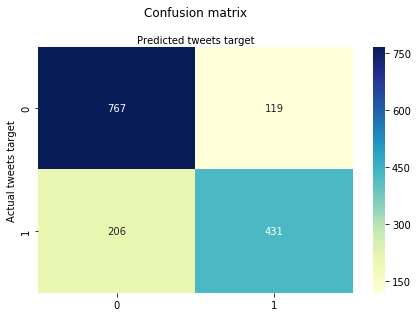

In [19]:
# visualise confusion matrix

class_names=[0,1] 
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual tweets target')
plt.xlabel('Predicted tweets target')

### Accuracy, Precision, Recall

In [20]:
print("Accuracy:",metrics.accuracy_score(y_true, y_pred))
print("Precision:",metrics.precision_score(y_true, y_pred))
print("Recall:",metrics.recall_score(y_true, y_pred))

Accuracy: 0.7866053841103086
Precision: 0.7836363636363637
Recall: 0.6766091051805337


# final prediction and submission using all data

## prepares model and vectors for whole training set

In [21]:
clf = linear_model.LogisticRegression()

train_vectors = count_vectorizer.fit_transform(train_df["text"])
test_vectors = count_vectorizer.transform(test_df["text"])

clf.fit(train_vectors, train_df["target"])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## loads submission file from kaggle

In [22]:
sample_submission = pd.read_csv("twitter/sample_submission.csv")

In [23]:
test_df.head()

,id,keyword,location,text
0,0,NaN,NaN,Just happened a terrible car crash
1,2,NaN,NaN,"Heard about #earthquake is different cities, s..."
2,3,NaN,NaN,"there is a forest fire at spot pond, geese are..."
3,9,NaN,NaN,Apocalypse lighting. #Spokane #wildfires
4,11,NaN,NaN,Typhoon Soudelor kills 28 in China and Taiwan


In [24]:
sample_submission.head()

,id,target
0,0,0
1,2,0
2,3,0
3,9,0
4,11,0


## predicts target 

In [25]:
sample_submission["target"] = clf.predict(test_vectors)

## saves to file

In [26]:
sample_submission.to_csv("submission.csv", index=False)